# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
data.isna().agg(['sum', 'mean']) # штуки и % пропусков

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
sum,0.0,5.00000,35.000000,227.000000,374.000000,11.000000,0.0,0.0,0.0
mean,0.0,0.00651,0.045573,0.295573,0.486979,0.014323,0.0,0.0,0.0


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
# data['Pregnancies'].fillna(data['Pregnancies'].median())  # проверял индивидуальные колонки
# data['Glucose'].fillna(data['Glucose'].median())
# data['BloodPressure'].fillna(data['BloodPressure'].median())
# data['SkinThickness'].fillna(data['SkinThickness'].median())
# data['Insulin'].fillna(data['Insulin'].median())
# data['BMI'].fillna(data['BMI'].mean())
# data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].mean())
# data['Age'].fillna(data['Age'].median())
# data['Class'].fillna(data['Class'].median())

data = data.apply(lambda x: x.fillna(x.mean()) if x.name in ['BMI', 'DiabetesPedigreeFunction'] else x.fillna(x.median()))
data.isna().agg(['sum', 'mean']) # штуки и % пропусков

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
data[(data["Class"] == 1) & (data["Age"] > 50)].shape[0]

38

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [7]:
import pandasql as ps

query = """
select *
from data 
order by Pregnancies desc
limit 3
"""

tst = ps.sqldf(query, locals())
tst

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
1,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
2,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [8]:
data[(data["Pregnancies"] >= 3) & (data["Age"] < 40) & (data["Age"] >= 30)].shape[0]

130

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
((data["BloodPressure"] <= 89) & (data["BloodPressure"] >= 80)).mean()

0.18880208333333334

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
data[(data.BloodPressure >= data.BloodPressure.mean()) & (data["BMI"] >= 30)].shape[0]

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [11]:
data.groupby('Class')[['Glucose', 'BloodPressure', 'Insulin']].mean()

,Glucose,BloodPressure,Insulin
Class,,,
0,110.682000,70.920000,127.792000
1,142.130597,75.123134,164.701493


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

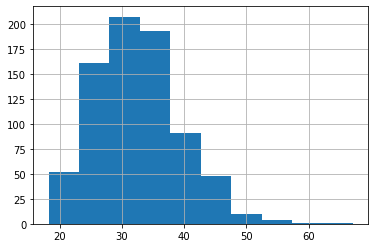

In [12]:
data.BMI.hist();

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

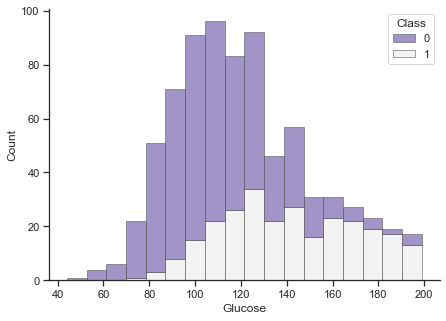

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data,
    x="Glucose", hue="Class",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5)


__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

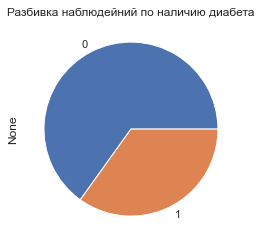

In [14]:
data.groupby('Class').size().plot(kind = 'pie', title = 'Разбивка наблюдейний по наличию диабета');

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

p = 9.30898e-27
The null hypothesis can be rejected


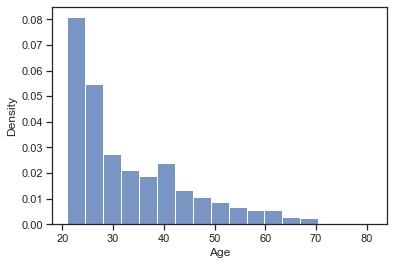

In [15]:
from scipy.stats import norm
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(min(data.Age),
                max(data.Age), 100)
sns.histplot(data.Age, stat="density")
mu, std = norm.fit(data.Age)


k2, p = stats.normaltest(data.Age)
alpha = 0.01
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 2.73373e-05
The null hypothesis can be rejected


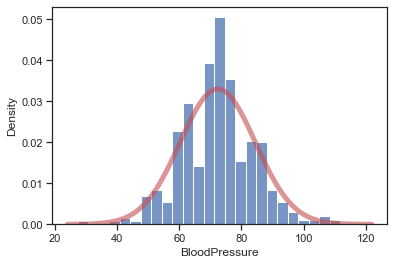

In [16]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plotdata = data.BloodPressure
fig, ax = plt.subplots(1, 1)
x = np.linspace(min(plotdata),
                max(plotdata), 100)
sns.histplot(plotdata, stat="density")
mu, std = norm.fit(plotdata)
ax.plot(x, norm.pdf(x, mu, std), 'r-', lw=5, alpha=0.6)

k2, p = stats.normaltest(plotdata)
alpha = 0.01
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

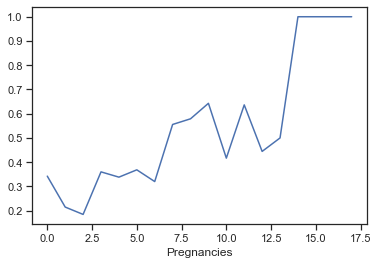

In [17]:
data.groupby('Pregnancies').Class.mean().plot(); # процент с признаком Class = 1 для каждой группы по значению Pregnancies

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [18]:
def to_binary_if_above(x):
    if x==0:
        return 0
    else:
        return 1

data["wasPregnant"] = data['Pregnancies'].apply(to_binary_if_above)

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [19]:
data.groupby('wasPregnant').Class.mean()

wasPregnant
0    0.342342
1    0.350076
Name: Class, dtype: float64

__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

<AxesSubplot:>

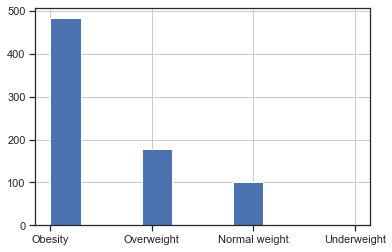

In [20]:
def bmi_convert(x):
    if x >= 25:
        if x >= 30:
            return "Obesity"
        else:
            return "Overweight"
    else:
        if x >= 18.5:
            return "Normal weight"
        else:
            return "Underweight"

data["bodyType"] = data['BMI'].apply(bmi_convert)
data.bodyType.hist()

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [21]:
p = data[((data["BloodPressure"] <= 89) & (data["BloodPressure"] >= 80)) & (data["bodyType"] == 'Normal weight')].Class.mean()
print(f'{p*100} % "здоровых" женщин больны диабетом')

10.0 % "здоровых" женщин больны диабетом
